<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/Machine%20Learning/25-neural/NeuralNetworks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


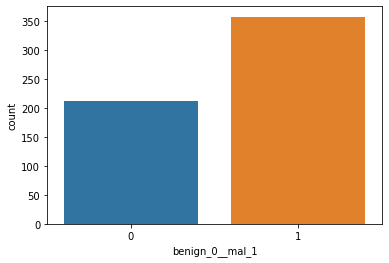

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

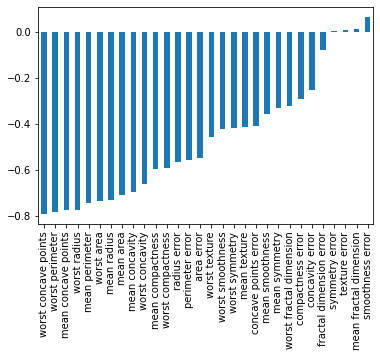

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

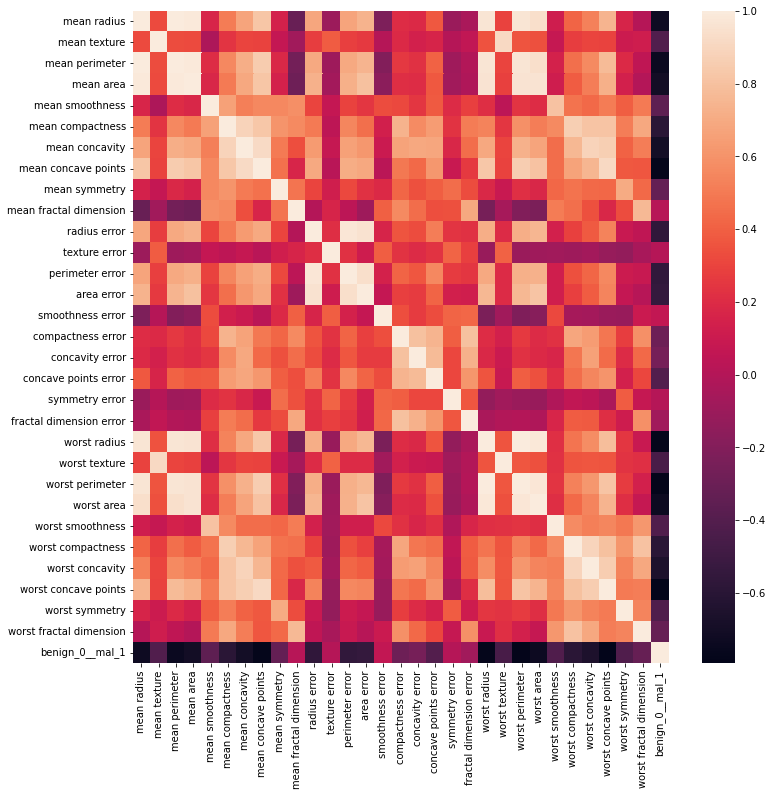

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense,Dropout

In [15]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary classification
model.add(Dense(1,activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6459 - val_loss: 0.6236
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6053 - val_loss: 0.5798
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5611 - val_loss: 0.5361
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5136 - val_loss: 0.4839
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4604 - val_loss: 0.4283
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4077 - val_loss: 0.3808
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3624 - val_loss: 0.3366
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3250 - val_loss: 0.3026
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3026 - val_loss: 0.2796
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2714 - val_loss: 0.2507
Epoch 11

In [18]:
losses = pd.DataFrame(model.history.history)

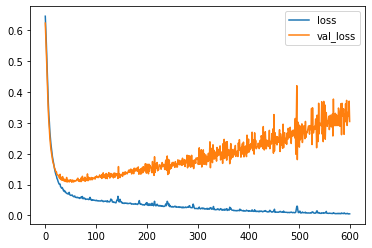

In [19]:
losses.plot()

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# help EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min', verbose=1, patience= 25)

In [23]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary classification
model.add(Dense(1,activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6876 - val_loss: 0.6633
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6508 - val_loss: 0.6357
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6190 - val_loss: 0.6033
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5872 - val_loss: 0.5671
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5486 - val_loss: 0.5254
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5070 - val_loss: 0.4807
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4643 - val_loss: 0.4373
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4225 - val_loss: 0.3929
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3812 - val_loss: 0.3543
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3461 - val_loss: 0.3182
Epoch 11

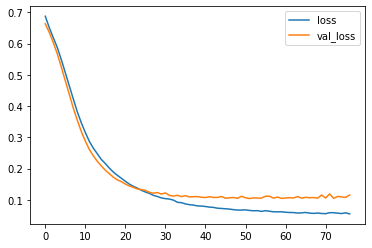

In [25]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [26]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#Binary classification
model.add(Dense(1,activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7045 - val_loss: 0.6878
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6912 - val_loss: 0.6774
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6772 - val_loss: 0.6658
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6632 - val_loss: 0.6505
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6504 - val_loss: 0.6318
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6207 - val_loss: 0.6030
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5970 - val_loss: 0.5661
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5633 - val_loss: 0.5306
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5392 - val_loss: 0.4976
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5144 - val_loss: 0.4618
Epoch 11

In [28]:
losses = pd.DataFrame(model.history.history)

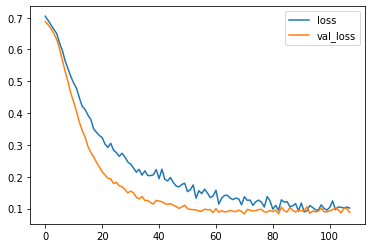

In [29]:
losses.plot()

In [34]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [37]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 1 87]]
